# Project : Holiday weather

Most people like taking holiday after several busy months. I am not an exception to this, So In this project I am going to use the historic weather data from the Weather Underground for Delhi to try to predict two good weather weeks to take off as holiday. Of course the weather in the summer of 2016 may be very different to 2014 but it should give some indication of when would be a good time to take a summer break.

# Getting the data
Weather Underground keeps historical weather data collected in many airports around the world. So i Right-clicked on the following URL below:

http://www.wunderground.com/history

Weather Underground has changed in the past the way it provides data and may do so again in the future. I have therefore collated the whole 2014 data in the provided 'Delhi_DEL_2014.csv' file which can be found in the project folder.

Now load the CSV file into a dataframe making sure that any extra spaces are skipped:

In [6]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

import pandas as pd
Delhi = pd.read_csv('Delhi_DEL_2014.csv', skipinitialspace=True)

from datetime import datetime

In [7]:
Delhi.head()

,Date,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees<br />
0,2014-1-1,-4,-7,-9,-9,-10,-11,82,70,58,...,2,2,2,6,2,NaN,0.0,8.0,NaN,-1<br />
1,2014-1-2,-1,-4,-8,-6,-8,-11,75,69,53,...,3,2,2,6,0,NaN,0.0,8.0,NaN,-1<br />
2,2014-1-3,1,-3,-8,-4,-6,-10,84,72,54,...,3,2,2,6,0,NaN,0.0,8.0,NaN,-1<br />
3,2014-1-4,-1,-2,-3,-4,-5,-6,80,74,64,...,8,4,2,14,2,NaN,0.0,8.0,NaN,-1<br />
4,2014-1-5,-1,-3,-6,-4,-6,-8,93,79,71,...,6,3,2,14,2,NaN,0.0,8.0,Snow,-1<br />


# Cleaning the data

First we need to clean up the data. I'm not going to make use of 'WindDirDegrees' in my analysis, but you might in yours so we'll rename 'WindDirDegrees< br />' to 'WindDirDegrees'.

In [8]:
Delhi = Delhi.rename(columns={'WindDirDegrees<br />' : 'WindDirDegrees'})

remove the < br /> html line breaks from the values in the 'WindDirDegrees' column.

In [9]:
Delhi['WindDirDegrees'] = Delhi['WindDirDegrees'].str.rstrip('<br />')

In [10]:
Delhi.dtypes

Date                           object
Max TemperatureC                int64
Mean TemperatureC               int64
Min TemperatureC                int64
Dew PointC                      int64
MeanDew PointC                  int64
Min DewpointC                   int64
Max Humidity                    int64
Mean Humidity                   int64
Min Humidity                    int64
Max Sea Level PressurehPa       int64
Mean Sea Level PressurehPa      int64
Min Sea Level PressurehPa       int64
Max VisibilityKm                int64
Mean VisibilityKm               int64
Min VisibilitykM                int64
Max Wind SpeedKm/h              int64
Mean Wind SpeedKm/h             int64
Max Gust SpeedKm/h            float64
Precipitationmm               float64
CloudCover                    float64
Events                         object
WindDirDegrees                 object
dtype: object

and change the values in the 'WindDirDegrees' column to float64:

In [11]:
Delhi['WindDirDegrees'] = Delhi['WindDirDegrees'].astype('float64')   

We definitely need to change the values in the 'GMT' column into values of the datetime64 date type.

In [12]:
Delhi['Date'] = pd.to_datetime(Delhi['Date'])

We also need to change the index from the default to the datetime64 values in the 'GMT' column so that it is easier to pull out rows between particular dates and display more meaningful graphs:

In [13]:
Delhi.index = Delhi['Date']

In [14]:
Delhi.head()

,Date,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-01,2014-01-01,-4,-7,-9,-9,-10,-11,82,70,58,...,2,2,2,6,2,NaN,0.0,8.0,NaN,-1.0
2014-01-02,2014-01-02,-1,-4,-8,-6,-8,-11,75,69,53,...,3,2,2,6,0,NaN,0.0,8.0,NaN,-1.0
2014-01-03,2014-01-03,1,-3,-8,-4,-6,-10,84,72,54,...,3,2,2,6,0,NaN,0.0,8.0,NaN,-1.0
2014-01-04,2014-01-04,-1,-2,-3,-4,-5,-6,80,74,64,...,8,4,2,14,2,NaN,0.0,8.0,NaN,-1.0
2014-01-05,2014-01-05,-1,-3,-6,-4,-6,-8,93,79,71,...,6,3,2,14,2,NaN,0.0,8.0,Snow,-1.0


# Finding a summer break

According to meteorologists, summer extends for the whole months of April to June in Delhi. So, I'm going to create a dataframe that holds just those months using the datetime index, like this:


In [15]:
summer = Delhi.loc[datetime(2014,4,1) : datetime(2014,6,30)]

In [16]:
summer.head()

,Date,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
Date,,,,,,,,,,,,,,,,,,,,,
2014-04-01,2014-04-01,9,1,-7,-2,-6,-9,93,57,28,...,11,10,10,21,6,NaN,0.00,2.0,NaN,186.0
2014-04-02,2014-04-02,14,6,-3,-2,-3,-7,89,50,15,...,14,10,10,11,5,NaN,0.00,1.0,NaN,50.0
2014-04-03,2014-04-03,16,8,0,1,-2,-4,78,40,15,...,11,10,10,11,3,NaN,0.00,1.0,NaN,23.0
2014-04-04,2014-04-04,12,8,3,3,1,-3,81,58,27,...,11,10,10,26,11,NaN,2.03,NaN,Rain,-1.0
2014-04-05,2014-04-05,20,11,1,1,-3,-8,78,39,9,...,11,10,10,19,5,NaN,0.00,2.0,NaN,260.0


I now look for the days with warm temperatures.

In [17]:
summer[summer['Mean TemperatureC'] >= 25]

,Date,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
Date,,,,,,,,,,,,,,,,,,,,,
2014-06-20,2014-06-20,36,26,16,12,9,2,56,24,10,...,14,11,10,21,5,NaN,0.0,NaN,NaN,-1.0
2014-06-21,2014-06-21,37,27,17,12,7,0,51,25,5,...,19,14,10,23,6,NaN,0.0,NaN,NaN,167.0
2014-06-22,2014-06-22,37,27,17,9,5,-6,34,21,4,...,14,11,10,23,6,NaN,0.0,1.0,NaN,106.0
2014-06-23,2014-06-23,33,26,18,14,11,4,50,34,16,...,11,10,10,26,8,NaN,0.0,1.0,NaN,31.0
2014-06-24,2014-06-24,31,25,19,13,11,7,56,36,19,...,14,11,10,26,10,NaN,0.0,2.0,Thunderstorm,6.0
2014-06-28,2014-06-28,34,26,18,16,9,8,69,30,16,...,18,13,10,19,6,NaN,0.0,3.0,NaN,8.0
2014-06-29,2014-06-29,34,26,18,13,11,8,57,35,15,...,11,10,10,21,8,NaN,0.0,1.0,Thunderstorm,327.0
2014-06-30,2014-06-30,32,25,18,15,13,6,68,41,20,...,11,10,10,21,6,NaN,0.0,1.0,NaN,10.0


Summer 2014 was rather cool in Delhi: there are  days with temperatures of 25 Celsius or higher. Best to see a graph of the temperature and look for the warmest period.

So next we tell Jupyter to display any graph created inside this notebook:

In [18]:
%matplotlib inline

Now let's plot the 'Mean TemperatureC' for the summer:

<AxesSubplot:xlabel='Date'>

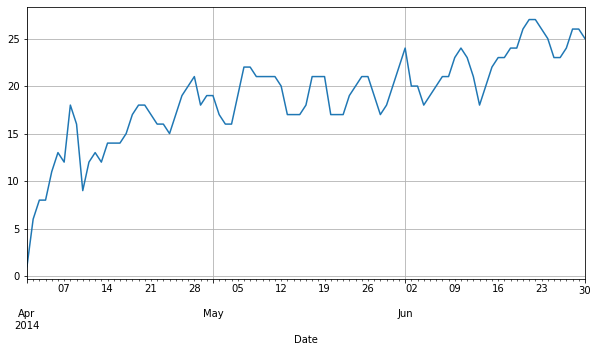

In [19]:
summer['Mean TemperatureC'].plot(grid=True, figsize=(10,5))

Well looking at the graph the month of Jue looks good for mean temperatures over 20 degrees C so let's also put precipitation on the graph too:

<AxesSubplot:xlabel='Date'>

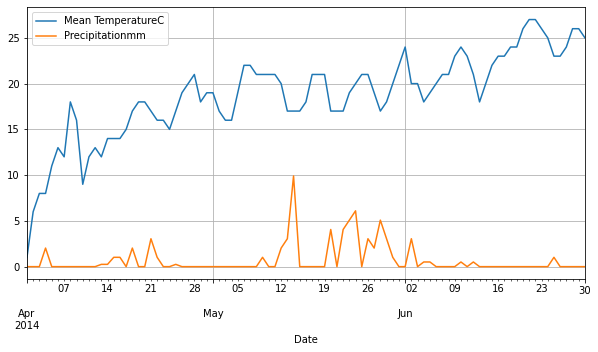

In [20]:
summer[['Mean TemperatureC', 'Precipitationmm']].plot(grid=True, figsize=(10,5))

The second quarter of the year is still looking good, April to June, 2019. the temperatures are still mean and there is mild rainfalls. The second half of June is good to be considered, with just a couple of peaks showing slight rainfall.

Let's have a closer look by just plotting mean temperature and precipitation for June.

<AxesSubplot:xlabel='Date'>

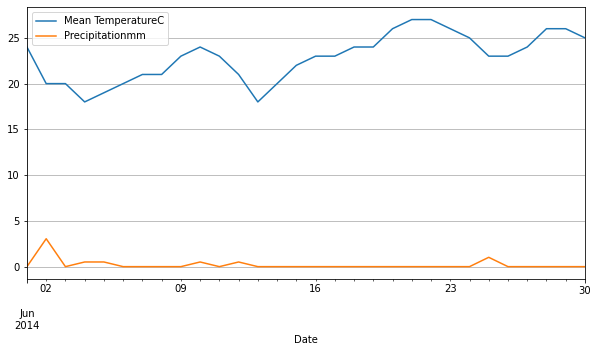

In [22]:
june = summer.loc[datetime(2014,6,1) : datetime(2014,6,30)]
june[['Mean TemperatureC', 'Precipitationmm']].plot(grid=True, figsize=(10,5))

Yes, second half of June looks pretty good, just two days that have slight rain, the 2nd and the 25th and just two (2) days when the mean temperature drops below 20 degrees, (On the 4th and 13th June)

Yes, No significant changes , the weather is overally fair, no rainfall to distrupt daily activity

# Conclusions¶
The graphs have shown the consistency of a Ghana summer, a couple of weeks were found when the weather was ideal for vacation in 2019. (Between 5th June to 15th June or between 17th to 30th June)

Of course this is no guarantee that the weather pattern will repeat itself in future years. To make a sensible prediction we would need to analyse the summers for many more years